In [10]:
%cd '/content/drive/MyDrive/classes/CVENG_8160/SPRING_2024/ML INTRO'

/content/drive/MyDrive/classes/CVENG_8160/SPRING_2024/ML INTRO


In [11]:
from dataset.data import *
from utils.model import *

In [12]:
import torch.nn as nn
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [13]:
traffic_obj = TrafficDataset('data','delay_bottleneck.csv')

In [14]:
## investigate
##  shuffling vs not shuffling
##  lr = 0.01,0.001,0.0001
n_epochs = 10
bs = 5000
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
model,losses, mean_loss = build_model(traffic_obj,bs,model,criterion,optimizer,n_epochs)

 10%|█         | 1/10 [00:02<00:18,  2.10s/it]

Epoch 1/10, Loss: 0.0394


 20%|██        | 2/10 [00:04<00:19,  2.43s/it]

Epoch 2/10, Loss: 0.0472


 30%|███       | 3/10 [00:07<00:18,  2.66s/it]

Epoch 3/10, Loss: 0.0645


 40%|████      | 4/10 [00:09<00:14,  2.41s/it]

Epoch 4/10, Loss: 0.0825


 50%|█████     | 5/10 [00:11<00:11,  2.28s/it]

Epoch 5/10, Loss: 0.0981


 60%|██████    | 6/10 [00:13<00:08,  2.19s/it]

Epoch 6/10, Loss: 0.1105


 70%|███████   | 7/10 [00:15<00:06,  2.13s/it]

Epoch 7/10, Loss: 0.1199


 80%|████████  | 8/10 [00:18<00:04,  2.30s/it]

Epoch 8/10, Loss: 0.1268


 90%|█████████ | 9/10 [00:21<00:02,  2.56s/it]

Epoch 9/10, Loss: 0.1318


100%|██████████| 10/10 [00:23<00:00,  2.36s/it]

Epoch 10/10, Loss: 0.1355


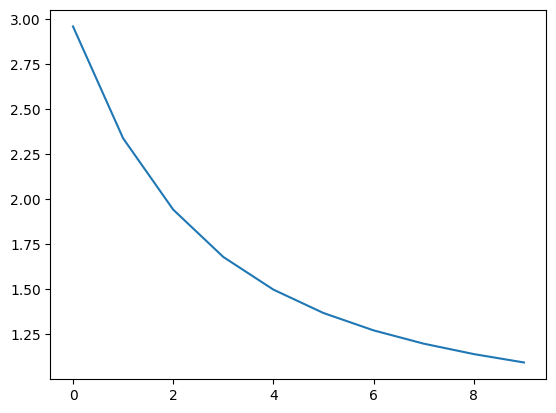

In [15]:
plt.plot(mean_loss)

In [16]:
bs = 5000
mu = traffic_obj.df['occupancy'].mean()
std = traffic_obj.df['occupancy'].mean()
dataloader = DataLoader(traffic_obj, batch_size=bs, shuffle=False, num_workers=4,drop_last=True)
pred_obj = Predict(model,mu,std)
pred_output = pred_obj(dataloader)

In [17]:
pred_output.keys()

dict_keys(['preds', 'targets', 'mape'])

In [18]:
pred_output['mape']

0.45897205514300615

In [ ]:
## predict occupancy from volume